In [3]:
# @title Bibliotecas
# Importação da bibliotecas do Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**1 Exploração do conjunto de dados**

In [4]:
# @title Carregar o dataset
# Carregar o conjunto de dados

url = "https://raw.githubusercontent.com/alvesdealmeida/dataset/refs/heads/main/TelecomCustomerChurn.csv"

df = pd.read_csv(url)

#df = pd.read_csv("/content/drive/MyDrive/Dataset/TelecomCustomerChurn.csv")
#display(df)

In [ ]:
# @title Exploração do conjunto de dados
# 1 Exploração do conjunto de dados
print("1 - Exploração dos Dados")

# Visualização das primeiras e últimas linhas do conjunto de dados
print(df.head())
print(df.tail())

In [ ]:
# @title Descrição das variáveis
# Descrever as variáveis
print("Descrição das variáveis:")
print(df.info())
print(df.describe(include='all'))

**2 Limpeza de Dados**

In [ ]:
# @title Limpeza dos Dados
# 2 Limpeza de Dados
# apagar a coluna Unnamed: 0 e IDCliente são colunas desnecessárias
df = df.drop(['customerID'], axis=1)

# Passo 2.1: Tratamento de valores ausentes
print("\nTratamento de valores ausentes")
missing_data = df.isnull().sum()

print("Valores ausentes por coluna:")
print(missing_data[missing_data > 0])

In [ ]:
# @title Imputação de valores numéricos pela média
# Imputação de valores numéricos pela média
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # converte para números
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
#df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [ ]:
# @title Imputação de valores categóricos pela moda
# Inputação de valores categóricos pela moda
#df['Dependentes'].fillna(df['Dependentes'].mode()[0], inplace=True)
#df['Churn'].fillna(df['Churn'].mode()[0], inplace=True)
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Churn'] = df['Churn'].fillna(df['Churn'].mode()[0])

In [ ]:
# @title Remoção de colunas e linhas vazias e

# Remover coluna vazia
#df.drop(columns=['Codigo'], inplace=True)

#Removendo linhas vazias
#df.dropna()

In [ ]:
# @title Correção de Erros e Inconsistências
# Passo 2.2: Correção de Erros e Inconsistências
df['Gender'] = df['Gender'].str.lower()  # Exemplo para uma coluna categórica

In [ ]:
# @title Remoção de dados duplicados
# Passo 2.3: Remoção de Duplicatas
df.drop_duplicates(inplace=True)

**3 Detecção e Tratamento de outliers parte 1**

In [ ]:
# @title Visualização de Outliers
# 3 Detecção e Tratamento de outliers
# Passo 3.1: Visualização dos outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot de Valor Mensal')
plt.show()

**Detecção e Tratamento de Outliers - parte 2**

In [ ]:
# @title Estatísticas descritivas para valor mensal
# Estatísticas descritivas para o valor mensal
desc_stats = df['MonthlyCharges'].describe()
q1 = desc_stats['25%']  # Primeiro quartil
median = desc_stats['50%']  # Mediana
q3 = desc_stats['75%']  # Terceiro quartil
iqr = q3 - q1  # Intervalo interquartil

# Definindo limites para outliers (valores fora de 1,5 vezes o intervalo interquartil)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrando valores que estão fora desses limites (outliers)
outliers = df[(df['MonthlyCharges'] < lower_bound) | (df['MonthlyCharges'] > upper_bound)]

# Exibindo estatísticas
print("Estatísticas Descritivas de MonthlyCharges:")
print(desc_stats)
print(f"\nIntervalo Interquartil (IQR): {iqr}")
print(f"Limite Inferior para Outliers: {lower_bound}")
print(f"Limite Superior para Outliers: {upper_bound}")
print(f"\nOutliers encontrados:\n{outliers}")

# Plotando o boxplot para visualizar
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='MonthlyCharges', color='skyblue')
plt.title("Boxplot de Valor Mensal")
plt.xlabel("MonthlyCharges")
plt.show()

**Comentários sobre o Boxplot MonthlyCharges sugere:**

**1 Distribuição Geral:**

Faixa de valores mensais entre aproximadamente 20 e 120.

O boxplot é bastante simétrico, indicando que os valores não possuem uma tendência acentuada de assimétria.  

**Quartis:**

A linha central representa a mediana, que parece estar próxima de 70, indicando que metade dos clientes paga abaixo desse valor e metade paga acima.

A parte inferior e superior do retângulo representam o primeiro e o terceiro quartil, respectivamente, mostrando que 50% dos valores estão concentrados aproximadamente entre 40 e 90.

**3 Amplitude e Disperção:**

A distância entre os quartis indica que há uma grande variação nos valores cobrados mensalmente.

Nâo há outliers visíveis (não se encontra ponto fora do intervalo dos limites do boxplot), o que é um indicador de que a maioria dos clientes paga da faixa esperada sem valores muito distantes.

**Síntese:**

 A ampla faixa de valores pode refletir a presença de diferentes planos ou pacotes oferecidos, com alguns mais acessíveis e outros premium. E como a mediana está próxima do terceiro quartil, isso pode ser um indicador de que uma proporção significativa de clientes paga um valor mais alto, enquanto há uma menor quantidade pagando valores abaixo de 70.          

In [ ]:
# @title Tratamento de Outliers
# Passo 3.2: Tratamento de outliers
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['MonthlyCharges'] >= Q1 - 1.5 * IQR) & (df['MonthlyCharges'] <= Q3 + 1.5 * IQR)]
print(df)

**4 Codificação e Padronização**

In [ ]:
# @title Codificação de variáveis categóricas
# 4 Codificação e Padronização
# Passo 4.1: Codificação de variáveis categóricas
df = pd.get_dummies(df, columns=['Gender', 'Partner', 'Churn'], drop_first=True)

In [ ]:
# @title Padronização ou Normalização
# Passo 4.2: Padronização ou Normalização
scaler = StandardScaler()
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])

**5 Feature Engineering e Visualização**

In [ ]:
# @title Criação de novas variáveis
# 5 Feature Engineering e Visualização
# Passo 5.1: Criação de Novas variáveis
df['TotalExpensePerMonth'] = df['TotalCharges'] / (df['Tenure'] + 1)

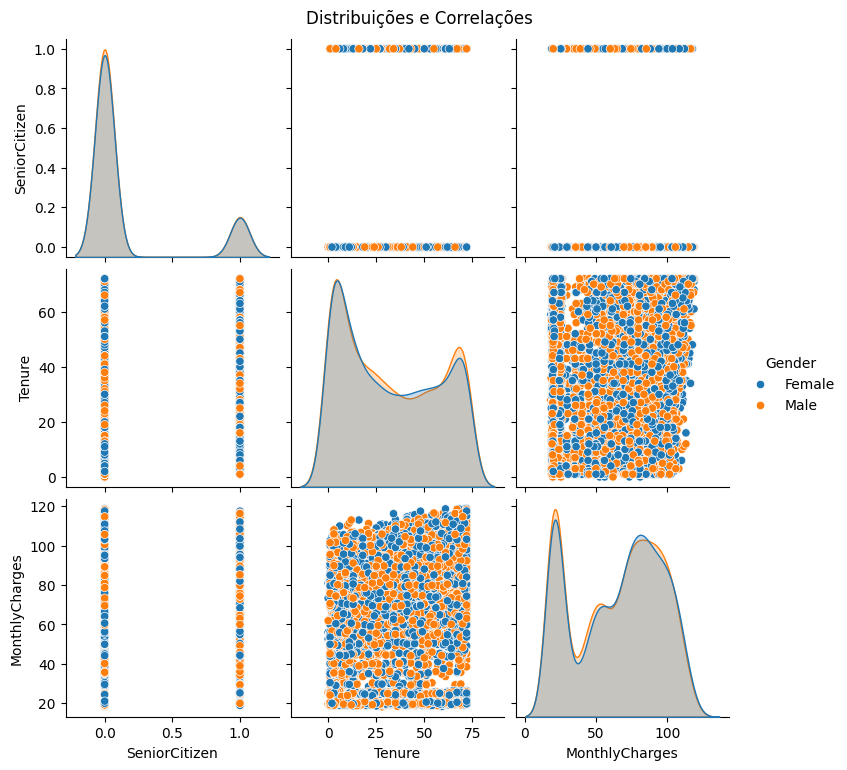

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [7]:
# @title Verificação se existe uma coluna "Gender" no dataset
#import seaborn as sns
#import matplotlib.pyplot as plt
#import numpy as np

# Verifique se 'Gender' existe e é categórica
if 'Gender' in df.columns and df['Gender'].dtype == 'object':
    # Confirme que há colunas numéricas no DataFrame
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        sns.pairplot(df, hue='Gender')
        plt.suptitle('Distribuições e Correlações', y=1.02)
        plt.show()
    else:
        print("O DataFrame não contém colunas numéricas para o pairplot.")
else:
    print("A coluna 'Gender' não está presente ou não é categórica.")
print(df.columns)

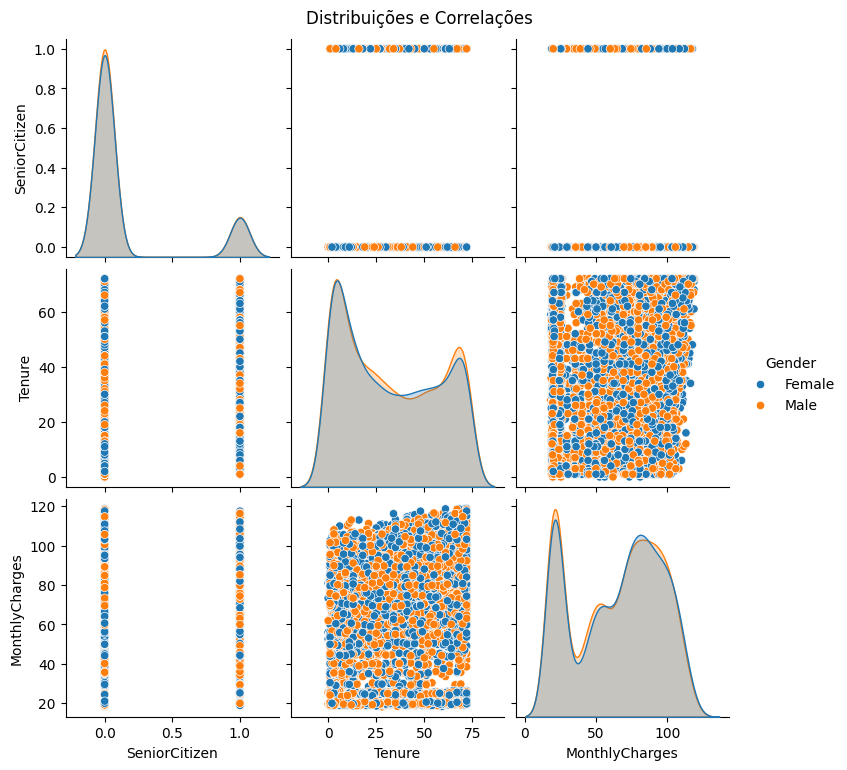

In [8]:
# @title Visualização das Distribuições e Correlações
# Passo 5.2: Visualização das Distribuições e Correlações
sns.pairplot(df, hue='Gender')
plt.suptitle('Distribuições e Correlações', y=1.02)
plt.show()

In [ ]:
# @title Conversão para colunas numéricas e Matriz de Correlação - heatmap
# Tentar converter todas as colunas para numérico, onde possível
df = df.apply(pd.to_numeric, errors='coerce')
# Selecionar apenas colunas numéricas para a matriz de correlação

numerical_df = df.select_dtypes(include=[np.number])

# Gerar Matriz de correlação e o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

**Relatório Final do Trabalho**

Para elaborar uma análise minuciosa, faz-se necessário focar em cada etapa definida no código para explorar e atender o conjunto de dados.

Ao final deste relatório é apresentado uma Situação problema com análise dos gráficos implementados.

A base de dados utilizada para esta análise foi a de uma simulação de uma operadora telefônica que apresentou um índice de cancelamentos de assinaturas. Esta base de dados foi extraido do site Kaggle, devido os dados serem públicos.

Eis o resumo detalhado que cada seção do código e em seguida a interpretação.

**1 Exploração dos Dados**

**As primeiras linhas e Estruturas do Conjunto de Dados:** Ao exibir as primeiras e últimas linhas do conjunto, é possível
observar a estrutura dos dados e verificar se as colunas contém os tipos de dados esperados.

**Descrição das Variáveis:** O comando "df.describe(include='all')" permite ver as principais estatísticas das variáveis ,
como média, desvio padrão e contagens para variáveis categóricas.

**Análise:**

**Tipos de Variáveis:** Identificar quais colunas são numéricas "(como ValorMensal e TotalGasto)" e quais são categóricas "(como
Genero, Dependente, Churn)".

**Estatísticas:** As variáveis numéricas devem mostrar medidas como média e dispersão, o que indica como dos dados estão distribuídos.
Para variáveis categóricas, é útil observar as frequências.

**2 Limpeza de Dados**

**Tratamento de Valores Ausentes:** Verica quais as colunas têm valores ausentes e os substitui conforme o tipo de variável. Por exemplo, para "TotalGasto", um valor numérico, é usada a média, enquanto para as variáveis categóricas, a  moda é a mais indicada.

**Remoção de Colunas Vazias:** A coluna "Codigo" foi removida por estar vazia ou irrelevante para a análise. Neste quesito,
as colunas "Unnamed: 0" e "IDCliente" também foram eliminadas, visto que não trariam relevância para a análise.

**Correção de Erros e inconsistências:** Normalizando a capitalização em "Genero" para evitar variações inconsistentes.

**Remoção de Duplicatas:** As duplicatas são eliminadas para assegurar que cada entrada seja única.

**Análise:**

**Impacto dos Valores Ausentes:** Com a imputação, verificou se a estrutura dos dados permanece coerente. A média em variáveis
numéricas minimiza o impacto da ausência, enquanto a moda em categórias garante que elas não sejam enviesadas.

**Inconsistências Categóricas:** Ao uniformizar as categorias, minimizamos possíveis erros de leitura ou processamento futuro.

**3 Detecção e Tratamento de Outliers**

**Identificação de Outliers:** A análise utiliza boxplots para visualizar dados extremos em colunas como "ValorMensal".

**Tratamento de Outliers:** Aplicação do método IQR para limitar os valores aos intervalos interquartis. Isso ajuda a suavizar
a distribuição, garantindo que os outliers não distorçam as análises.

**Análise:**

**Visualização de Boxplot:** Facilita identificar quais variáveis têm valores atípicos significativos.

**Tratamento de Outliers:** Remover ou ajustar outliers ajuda a obter uma visão mais realista, especialmente para análises que dependem
de médias.

Reprodução: **Comentários do Boxplot MonthlyCharges sugere:**

**1 Distribuição Geral:**

Faixa de valores mensais entre aproximadamente 20 e 120.

O boxplot é bastante simétrico, indicando que os valores não possuem uma tendência acentuada de assimétria.  

**Quartis:**

A linha central representa a mediana, que parece estar próxima de 70, indicando que metade dos clientes paga abaixo desse valor e metade paga acima.

A parte inferior e superior do retângulo representam o primeiro e o terceiro quartil, respectivamente, mostrando que 50% dos valores estão concentrados aproximadamente entre 40 e 90.

**3 Amplitude e Disperção:**

A distância entre os quartis indica que há uma grande variação nos valores cobrados mensalmente.

Nâo há outliers visíveis (não se encontra ponto fora do intervalo dos limites do boxplot), o que um indicador de que a maioria dos clientes paga da faixa esperada sem valores muito distantes.

Síntese:

 A ampla faixa de valores pode refletir a presença de diferentes planos ou pacotes oferecidos, com alguns mais acessíveis e outros premium. E como a mediana está próxima do terceiro quartil, isso pode ser um indicador de que uma proporção significativa de clientes paga um valor mais alto, enquanto há uma menor quantidade pagando valores abaixo de 70.          

**4 Codificação e Padronização**

**Codificação de Varias Categórias:** A conversão das colunas categóricas "(Genero, Casado, Churn)" para variáveis numéricas
(usando One-Hot Encoding) permite aplicá-las em modelos de aprendizado de máquina e facilita o cálculo de correlações.

**Padronização ou Normalização:** A normalização das colunas "ValorMensal" e "TotalGasto" paera uma escala padrão permite compará-las
diretamente, sem viés de magnitude.

**Análise:**

**Interpretação das Variáveis Codificadas:** As colunas geradas pela codificação binária representam as categorias originais e
permitem uma análise mais robusta.

**Normalização:** Melhora a consistência da análise quantitativa ao reduzir a influência de escalas variáveis.


**5 Feature Engineering e Visualização**

**Criação de Novas Variáveis:** O cálculo de "GastoTotalPorMes" oferece ideias (insights) sobre o comportamento dos clientes
ao longo do tempo, ajustado pelos meses de associação.

**Visualização das Distribuições e Correlações:**

**Paiplot:** A função "sns.pairplot" ajuda a entender a relação entre as variáveis
numéricas e identifica possíveis associações.

**Heatmap de Correlação:** A matriz de correlação visualizada por um heatmap
ajuda  ver quais variáveis têm fortes relações entre si. Isso é útil para detectar multicolinearidade, que pode distorcer
modelos preditivos.

**Análise:**

**Ideia (insight) das Novas Variáveis:** A variável "GastoTotalPorMes" pode revelar tendências de consumo e fidelidade.

**Distribuição e Correlação:** Com a matriz de correlação, podemos identificar padrões, como se há correlação entre "TotalGasto" e
"ValorMensal".

Em síntese, conclui-se que esta análise de dados auxiliará nos seguintes **objetivos:**

**Identificar** padrões e associações no comportamento dos clientes, como gasto médio, relação com churn, etc.

**Fornecer** uma base limpa e padronizada para análises avançadas ou modelos preditivos.

**Destacar** ideias (insights) para ações estratégicas, como fidelização de clientes com alto gasto mensal ou previsão de churn
para clintes em situações específicas.

**Situação Problema**

Não é suficiente saber utilizar as ferramentas tecnológicas para trabalhar com dados estatísticos.

É necessário entender o problema que se quer resolver e então, a partir desta visão, implementar os meios necessários para solucioná-lo.

A base de dados tem um coluna "Churn" que mostra que muitos clientes estão cancelando as assinaturas dos serviços de uma operadora de telefonia. Diante deste cenário, questões são levantadas e requerem medias para mitigar esta saída de clientes e trazê-los de volta.

**Questões:**

**Qual é o problema?**

Alto índice de cancelamento de contratos.

**O que fazer diante do problema?**

Entender os principais motivos que levam ao cancelamento para então implementar
um plano de ação.

In [ ]:
# @title Carregar dataset
planilha = "https://raw.githubusercontent.com/alvesdealmeida/dataset/refs/heads/main/TelecomCustomerChurn.csv"
telefonia = pd.read_csv(planilha)
telefonia

In [ ]:
# @title Tratamento dos dados
# Tratando os dados
print(telefonia.info())

In [ ]:
# @title Ajustamento da coluna "TotalCharges" para tipo numérico
# A coluna TotalCharges está classificada como Object, mas se trata de números e deve ser tratada como tal
telefonia["TotralCharges"] = pd.to_numeric(telefonia["TotalCharges"], errors="coerce")

In [ ]:
# @title Remoção de coluna vazia
# Removendo a coluna que esteja toda vazia
telefonia = telefonia.dropna(how="all", axis=1)

In [ ]:
# @title Remoção de linhas vazias
# Removendo a linha vazia, caso tenha
telefonia = telefonia.dropna()

In [ ]:
# @title Visão resumida do dataset usando o info()
print(telefonia.info())

**Analise de Dados:**

**Problema:**

Alto índice de cancelamento de contratos.

**O que fazer?**

Entender e compreender os motivos principais que
levaram o cliente a cancelar as assinaturas e implementar
um plano de ação.

In [ ]:
# @title Análise Exploratória (verificação do grau/tamanho de Cancelamentos)
# Analise exploratória para ver o grau/tamanho de cancelamentos de assinaturas
display(telefonia["Churn"].value_counts())
display(telefonia["Churn"].value_counts(normalize=True))

In [ ]:
# @title Melhorando a visualização (passando o resultado para porcentagem)
# Melhorando a visualziação dos valores passando para porcetagem para ser entendido ao bater o olho
display(telefonia["Churn"].value_counts())
display(telefonia["Churn"].value_counts(normalize=True).map('{:.1%}'.format))

**Churn** é uma métrica utilizada para mostrar a quantidade de clientes que cancelaram um determinado serviço em um determinado período de tempo.
No caso da telefônica o **índice de cancelamento**, após os devidos ajustes na
base de dados, é de **26.6%** .

In [ ]:
# @title Análise dos dados por meio dos Gráficos
# Analisando Dados por meio dos Gráficos
import plotly.express as px

In [ ]:
# @title Implementação de código para visualização de vários gráficos
# Há muitas colunas e para criação de vários gráficos- uso do laço de repetição for
for coluna in telefonia:
    if coluna != "customerID":
       fig = px.histogram(telefonia, x=coluna, color="Churn")
       fig.show()
       display(telefonia.pivot_table(index="Churn", columns=coluna, aggfunc="count")["customerID"])

**Análise de Dados Gráfico Contrato:**

**Problema:**

Contrato Mensal com alta taxa de cancelamento superior aos demais tipos de pagamentos.

**Ação:**

Melhorar as condições comerciais dos planos anuais com o objetivo de atrair o cliente para
essa modalidade.

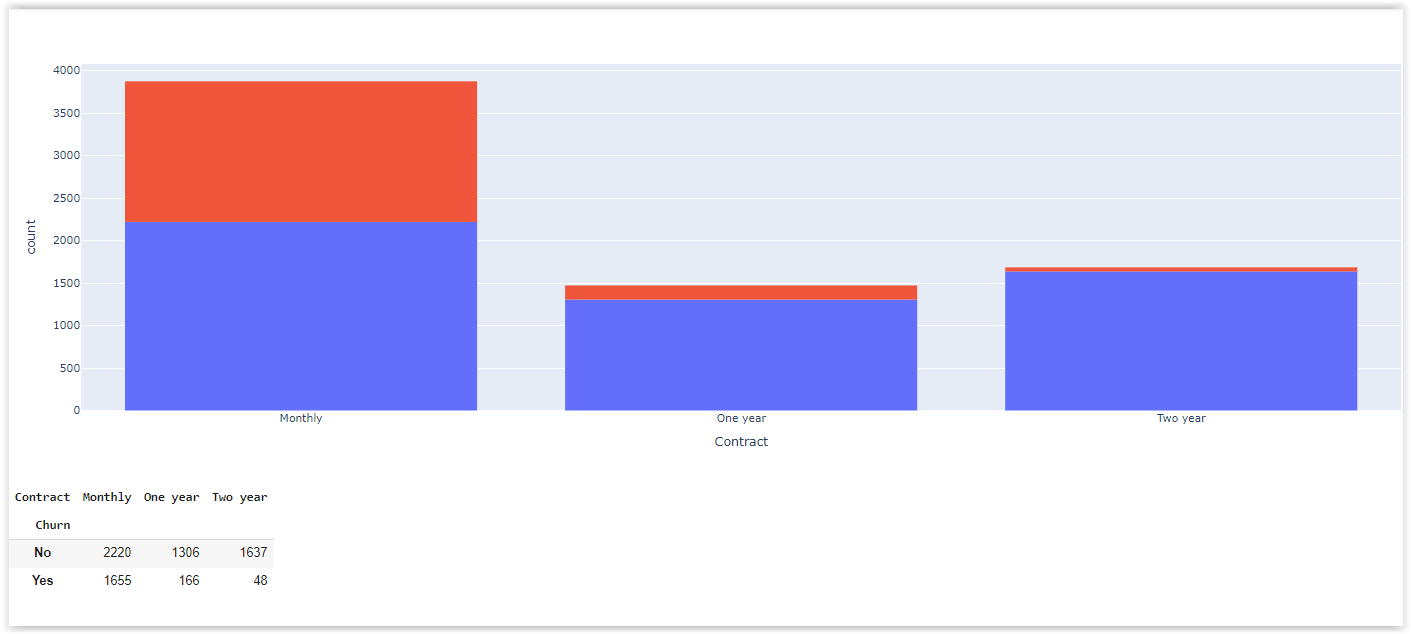


**Análise do Grafico Método de Pagamento**

**Problema:**

Nível de cancelamento, devido ao  pagamento manual, é elevado em relação aos outros métodos.

**Possíveis Razões:**

Esquecimento ou dificuldade em efetuar o pagamento.

Inconveniência do processo manual.

Falta de acompanhamento.

**Ações:**

Incentivar a adoção de pagamentos automáticos: oferecer incentivos, como descontos ou pontos de fidelidade para os clientes
optarem mudar de método de pagamento (para o automático).

Implementar lembretes de pagamento e notificações: Enviar lembretes automáticos por e-mail, sms ou notificações pelo aplicativo para os clientes.

Facilitar a migração para pagamento automático: Tornar o processo de alteração do método de pagamento simples e acessível para que os clientes possam
migrar para os outros métodos automáticos.

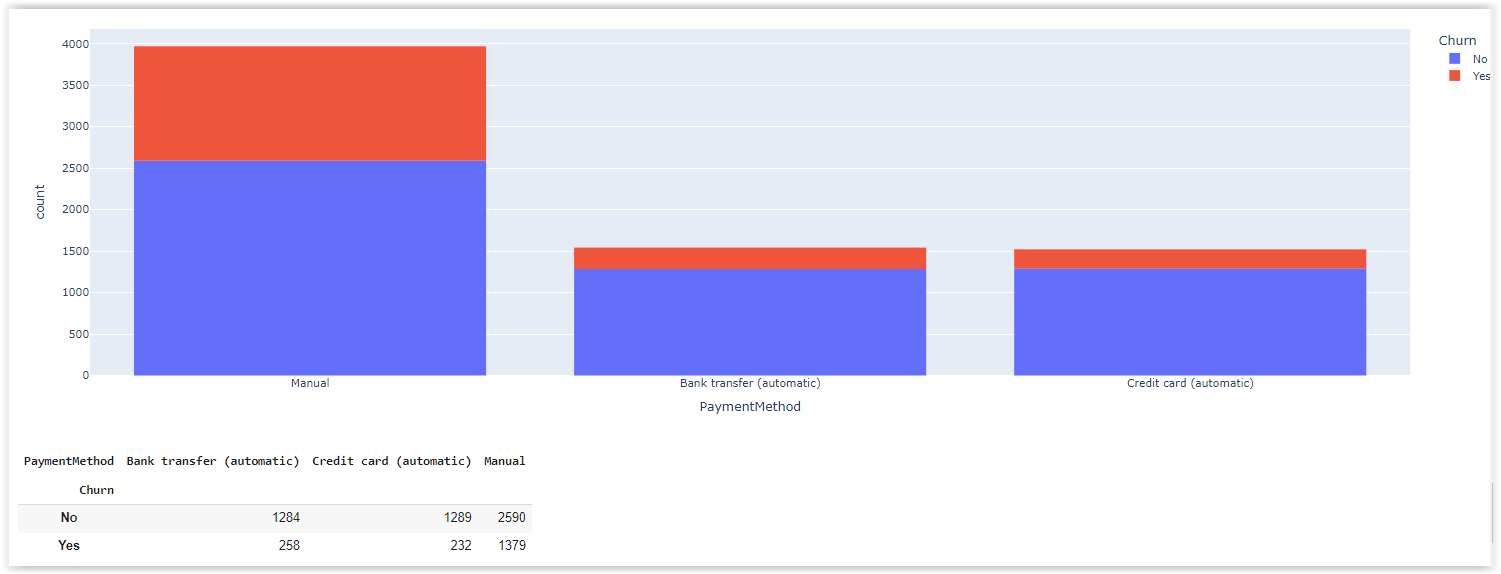

**Fonte da Base de Dados:**

**Kaggle**

https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

https://github.com/alvesdealmeida/dataset
